In [12]:
using Revise
using HierarchicalDA
using LinearAlgebra
using Statistics
using Distributions
using QuadGK

In [9]:
using CairoMakie
using LaTeXStrings

In [11]:
# Start with a simple example
πθ = Gamma(0.1, 0.5)
πXgivenθ(x, θ) = pdf(Normal(0, sqrt(θ)), x)
πYgivenX(y,x) = pdf(Normal(0, 1.0), y-x)

πYgivenX (generic function with 1 method)

In [53]:
θgrid = 0.0:0.001:5.0
xgrid = -3:0.01:3.0

-3.0:0.01:3.0

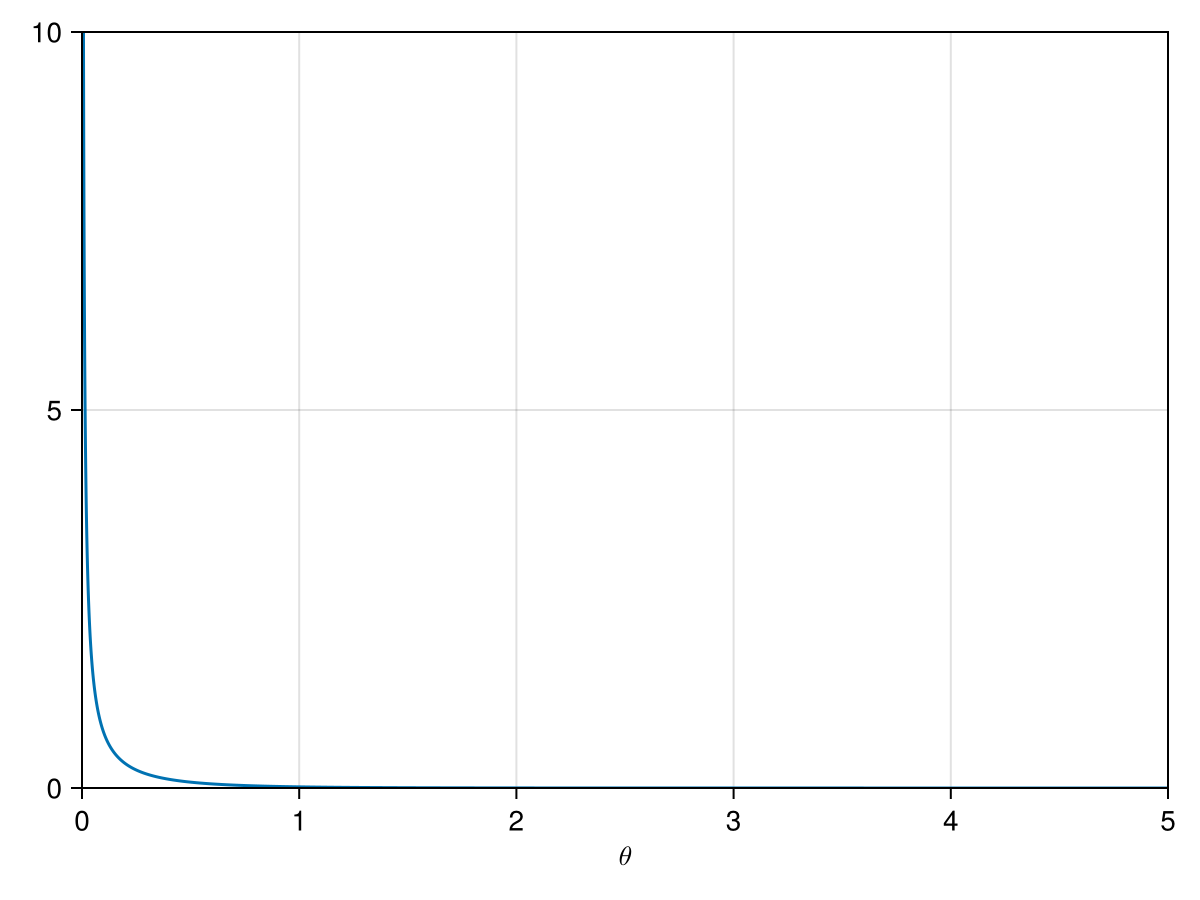

In [66]:
fig = Figure()

ax = Axis(fig[1,1], 
          xlabel = L"\theta")

lines!(ax, θgrid, θ -> pdf(πθ, θ))
    
xlims!(ax, θgrid[1], θgrid[end])
    
fig

In [55]:
πXYθ(x,y,θ) = πYgivenX(y,x)*πXgivenθ(x, θ)*pdf(πθ, θ)

πXYθ (generic function with 1 method)

In [56]:
πYθ(y, θ) = quadgk(x->πXYθ(x,y,θ), -Inf, Inf)[1]

πYθ (generic function with 1 method)

In [57]:
πXY(x, y) = quadgk(θ->πXYθ(x,y,θ), 0.0, Inf)[1]

πXY (generic function with 1 method)

In [58]:
πXgivenYθ(x,y,θ) = πXYθ(x,y,θ)/πYθ(y, θ)

πXgivenYθ (generic function with 1 method)

In [59]:
πθgivenXY(θ,x,y) = πXYθ(θ,x,y)/πXY(x,y)

πθgivenXY (generic function with 1 method)

In [60]:
πXgivenYθ_true = Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [61]:
xstar = 0.5
ystar = 1.0
θstar = 0.1

0.1

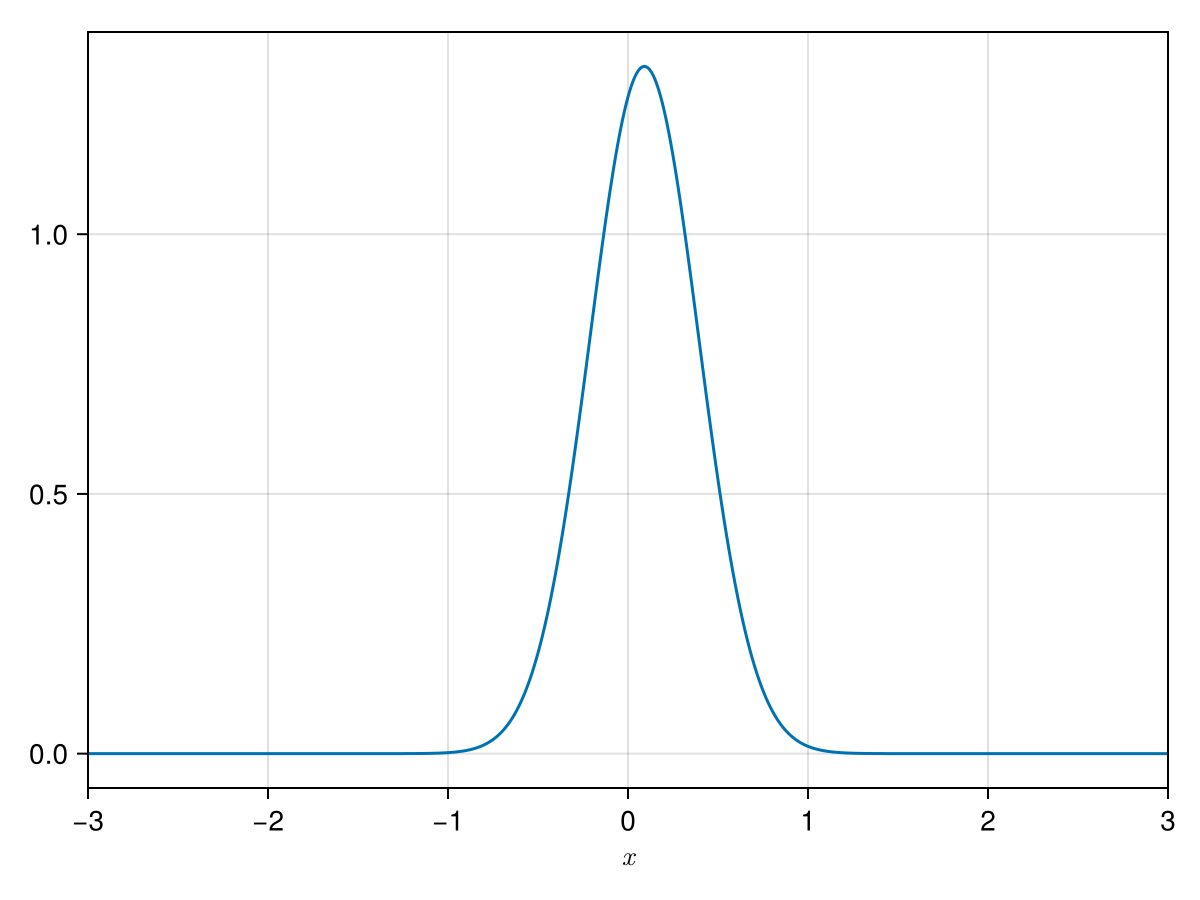

In [62]:
fig = Figure()

ax = Axis(fig[1,1], 
          xlabel = L"x")

lines!(ax, xgrid, x -> πXgivenYθ(x,ystar,θstar))
    
xlims!(ax, xgrid[1], xgrid[end])
    
fig

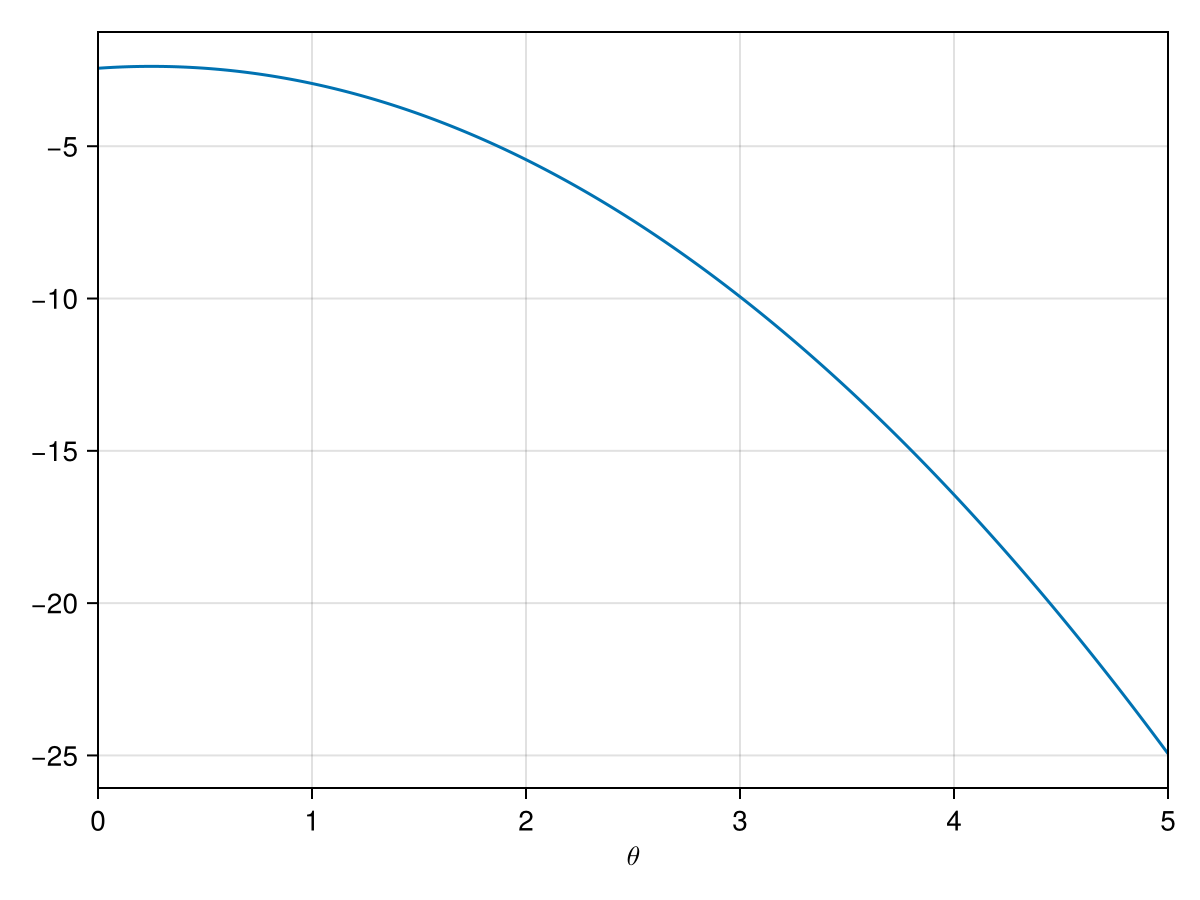

In [64]:
fig = Figure()

ax = Axis(fig[1,1], 
          xlabel = L"\theta")

# lines!(ax, θgrid, θ -> pdf(πθ, θ))
lines!(ax, θgrid, θ -> log(πθgivenXY(θ,xstar,ystar)))

    
xlims!(ax, θgrid[1], θgrid[end])
    
fig